# Manpreet Dhindsa - COMP 541 - Student Success Prediction

In [1]:
# Load data using Pandas
import pandas as pd
import os
def load_student_data(housing_path=r"C:\Users\mdhindsa\Documents\CSUN\Fall2023\COMP_541"):
    csv_path = os.path.join(housing_path, "processed_data.csv")
    return pd.read_csv(csv_path)
student = load_student_data()

In [2]:
# a) How many tuples does the student data set have? (Check out the data frame)
num_tuples, num_columns = student.shape
print("Number of tuples (rows) in the student dataset:", num_tuples)

Number of tuples (rows) in the student dataset: 4424


In [3]:
# b) How many features does the student data set have? Print a name list.
feature_names = student.columns[:-1] 
print("Number of features in the student dataset: " + str(len(feature_names)))
print("Features in the student dataset: " + str(feature_names.to_list()))

Number of features in the student dataset: 36
Features in the student dataset: ['marital_status', 'application_mode', 'application_order', 'course', 'daytime_evening_attendance', 'previous_qualification', 'previous_qualification_grade', 'nationality', 'mothers_qualification', 'fathers_qualification', 'mothers_occupation', 'fathers_occupation', 'admission_grade', 'displaced', 'educational_special_needs', 'debtor', 'tuition_fees_up_to_date', 'gender', 'scholarship_holder', 'age_at_enrollment', 'international', 'curricular_units_1st_sem_credited', 'curricular_units_1st_sem_enrolled', 'curricular_units_1st_sem_evaluations', 'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade', 'curricular_units_1st_sem_without_evaluations', 'curricular_units_2nd_sem_credited', 'curricular_units_2nd_sem_enrolled', 'curricular_units_2nd_sem_evaluations', 'curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade', 'curricular_units_2nd_sem_without_evaluations', 'unemployment_rate',

In [5]:
# c) What’s the data type for each feature?
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   marital_status                                4424 non-null   int64  
 1   application_mode                              4424 non-null   int64  
 2   application_order                             4424 non-null   int64  
 3   course                                        4424 non-null   int64  
 4   daytime_evening_attendance                    4424 non-null   int64  
 5   previous_qualification                        4424 non-null   int64  
 6   previous_qualification_grade                  4424 non-null   float64
 7   nationality                                   4424 non-null   int64  
 8   mothers_qualification                         4424 non-null   int64  
 9   fathers_qualification                         4424 non-null   i

In [8]:
# d) How many of each target do you have?
print("Count of each target in the student dataset: " + str(student['target'].value_counts()))

Count of each target in the student dataset: target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


In [9]:
# e) What’s the mean, median, quantiles and range (max-min) for each curricular measurements?
numeric_columns = student[['curricular_units_1st_sem_credited', 'curricular_units_1st_sem_enrolled', 'curricular_units_1st_sem_evaluations', 'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade', 'curricular_units_1st_sem_without_evaluations', 'curricular_units_2nd_sem_credited', 'curricular_units_2nd_sem_enrolled', 'curricular_units_2nd_sem_evaluations', 'curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade', 'curricular_units_2nd_sem_without_evaluations']]
measurements = numeric_columns.describe()
ranges = numeric_columns.max() - numeric_columns.min()
medians = numeric_columns.median()
measurements.loc['range'] = ranges
measurements.loc['median'] = medians
print(measurements)

        curricular_units_1st_sem_credited  curricular_units_1st_sem_enrolled  \
count                         4424.000000                        4424.000000   
mean                             0.709991                           6.270570   
std                              2.360507                           2.480178   
min                              0.000000                           0.000000   
25%                              0.000000                           5.000000   
50%                              0.000000                           6.000000   
75%                              0.000000                           7.000000   
max                             20.000000                          26.000000   
range                           20.000000                          26.000000   
median                           0.000000                           6.000000   

        curricular_units_1st_sem_evaluations  \
count                            4424.000000   
mean                   

<Axes: xlabel='previous_qualification_grade', ylabel='admission_grade'>

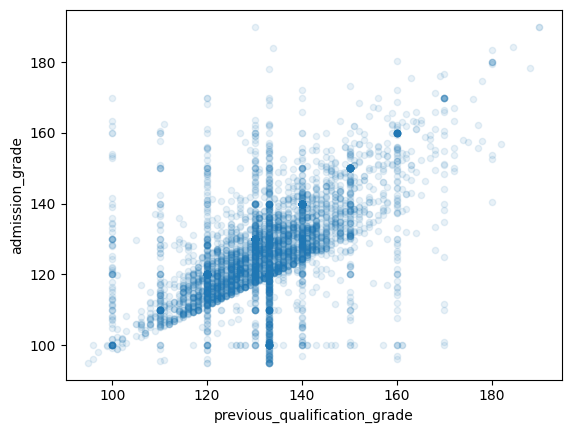

In [12]:
# f) Make a scatter plot of previous_qualification_grade vs admission_grade.
student.plot(kind="scatter", x="previous_qualification_grade", y="admission_grade", alpha=0.1)

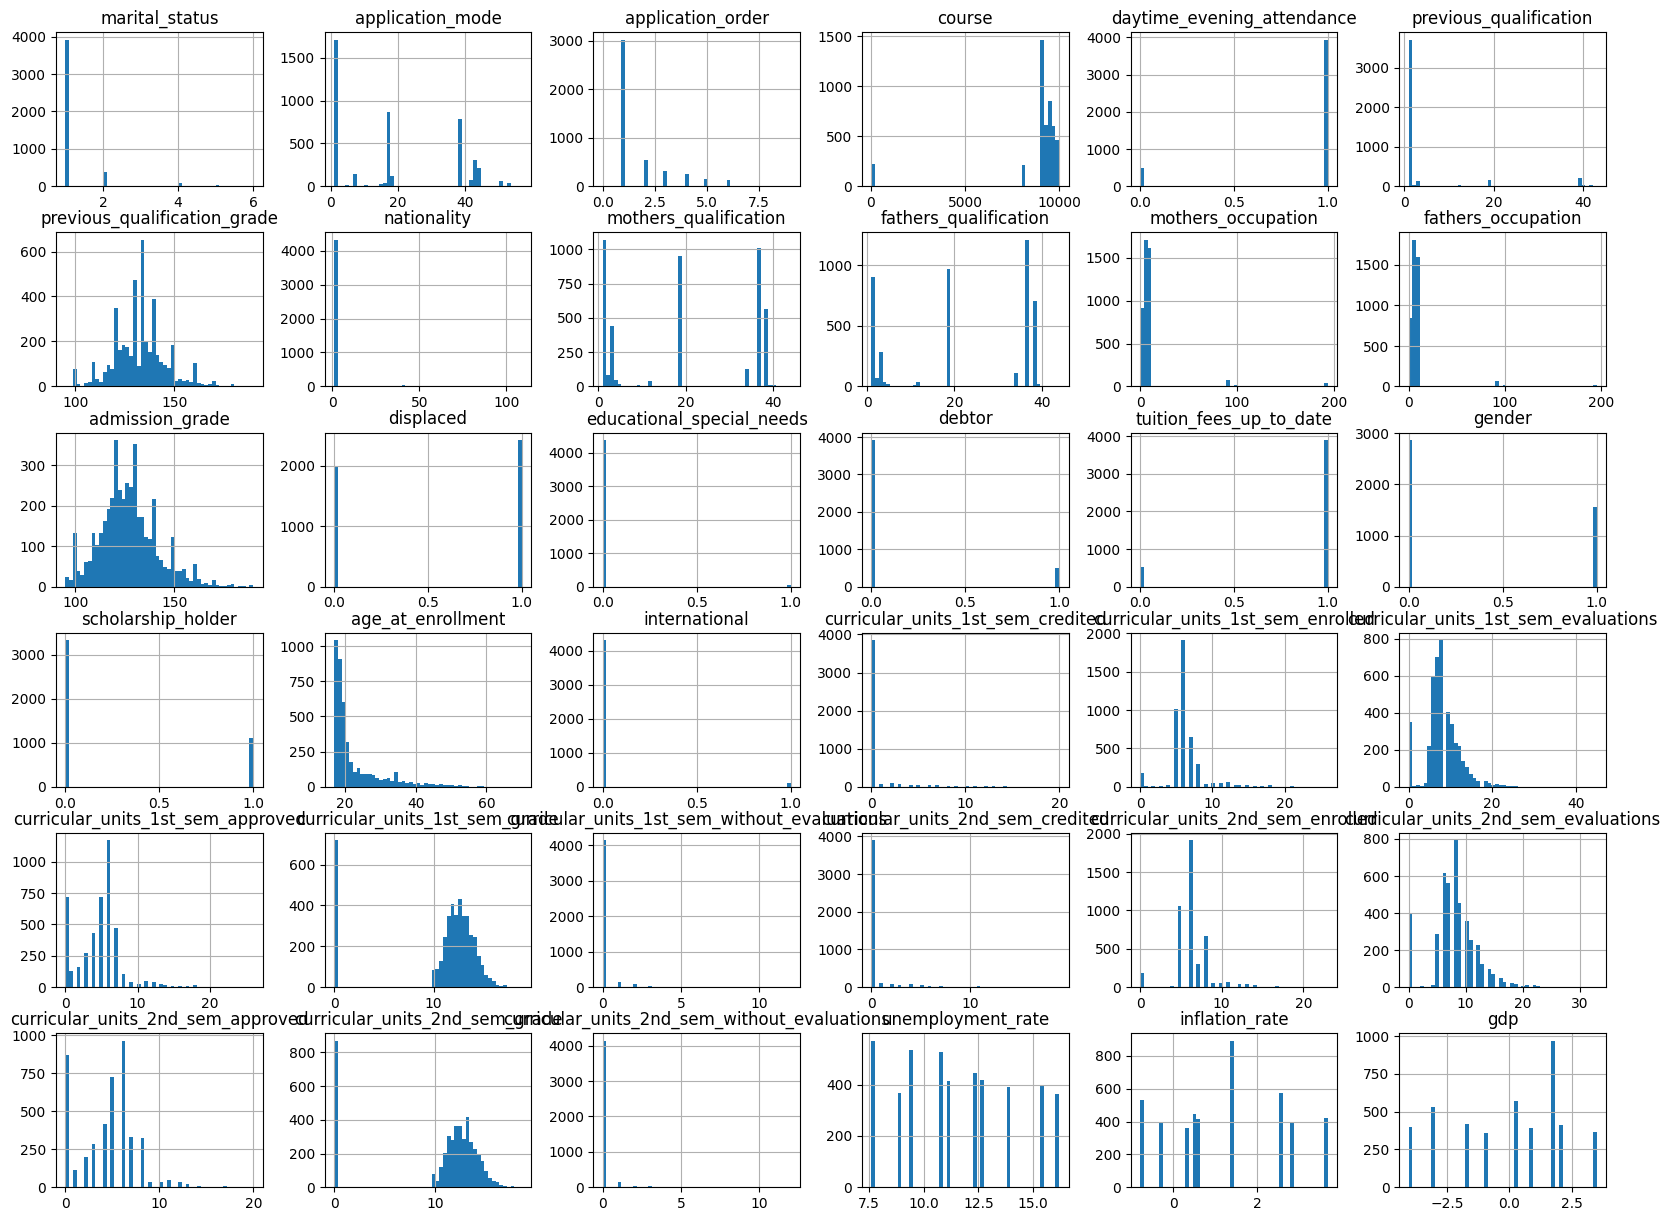

In [10]:
# g) Create four individual histogram plots in a single figure, where each plot contains one feature.
%matplotlib inline 
import matplotlib.pyplot as plt
student.hist(bins=50, figsize=(20,15))
plt.show()

array([[<Axes: title={'center': 'admission_grade'}, xlabel='[target]'>,
        <Axes: title={'center': 'age_at_enrollment'}, xlabel='[target]'>,
        <Axes: title={'center': 'application_mode'}, xlabel='[target]'>,
        <Axes: title={'center': 'application_order'}, xlabel='[target]'>,
        <Axes: title={'center': 'course'}, xlabel='[target]'>,
        <Axes: title={'center': 'curricular_units_1st_sem_approved'}, xlabel='[target]'>],
       [<Axes: title={'center': 'curricular_units_1st_sem_credited'}, xlabel='[target]'>,
        <Axes: title={'center': 'curricular_units_1st_sem_enrolled'}, xlabel='[target]'>,
        <Axes: title={'center': 'curricular_units_1st_sem_evaluations'}, xlabel='[target]'>,
        <Axes: title={'center': 'curricular_units_1st_sem_grade'}, xlabel='[target]'>,
        <Axes: title={'center': 'curricular_units_1st_sem_without_evaluations'}, xlabel='[target]'>,
        <Axes: title={'center': 'curricular_units_2nd_sem_approved'}, xlabel='[target]'>],
 

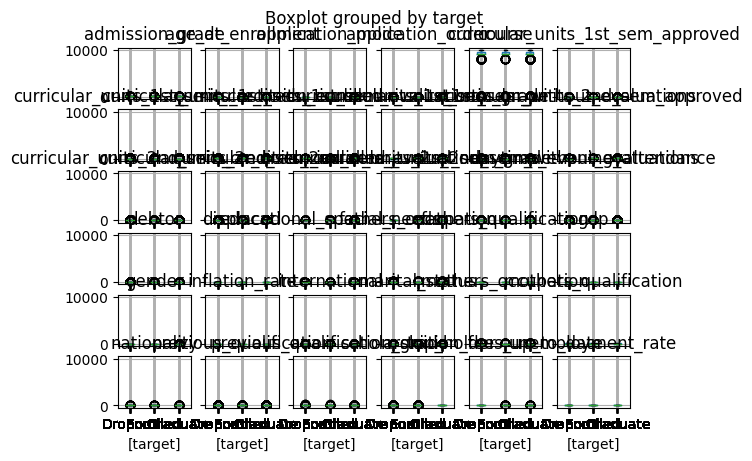

In [13]:
# h) Create four individual boxplots in a single figure, where each plot contains one feature.
student.boxplot(by='target')

array([[<Axes: xlabel='previous_qualification_grade', ylabel='previous_qualification_grade'>,
        <Axes: xlabel='admission_grade', ylabel='previous_qualification_grade'>],
       [<Axes: xlabel='previous_qualification_grade', ylabel='admission_grade'>,
        <Axes: xlabel='admission_grade', ylabel='admission_grade'>]],
      dtype=object)

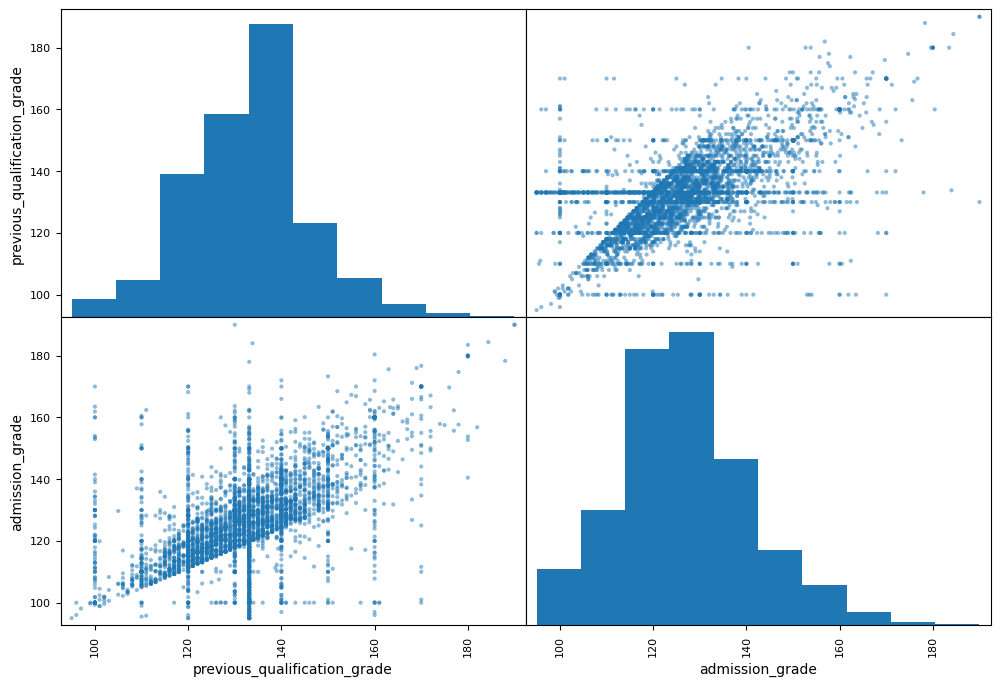

In [14]:
# i) Make a scatter plot matrix to examine the correlation between previous_qualification_grade and admission_grade.
import pandas
from pandas.plotting import scatter_matrix
attributes = ["previous_qualification_grade", "admission_grade"]
scatter_matrix(student[attributes], figsize=(12, 8))

In [15]:
# Bring in the categories using the dictionaries defined in processor.py
import processor

features_to_categorize = {
    'marital_status': processor.marital_status,
    'application_mode': processor.application_mode,
    'course': processor.course,
    'daytime_evening_attendance': processor.daytime_attendance,
    'previous_qualification': processor.previous_qualification,
    'nationality': processor.nationality,
    'mothers_qualification': processor.mother_qualification,
    'fathers_qualification': processor.father_qualification,
    'mothers_occupation': processor.mother_occupation,
    'fathers_occupation': processor.father_occupation,
    'displaced': processor.displaced,
    'educational_special_needs': processor.educational_special_needs,
    'debtor': processor.debtor,
    'tuition_fees_up_to_date': processor.tuition_fees_up_to_date,
    'gender': processor.gender,
    'scholarship_holder': processor.scholarship,
    'international': processor.international
}

for feature in features_to_categorize:
    student[feature] = student[feature].map(features_to_categorize[feature])
    student[feature] = student[feature].astype('category')

student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   marital_status                                4424 non-null   category
 1   application_mode                              4424 non-null   category
 2   application_order                             4424 non-null   int64   
 3   course                                        4424 non-null   category
 4   daytime_evening_attendance                    4424 non-null   category
 5   previous_qualification                        4424 non-null   category
 6   previous_qualification_grade                  4424 non-null   float64 
 7   nationality                                   4424 non-null   category
 8   mothers_qualification                         4424 non-null   category
 9   fathers_qualification                         4424 n

In [16]:
print("Count of each category in nationality: " + str(student['nationality'].value_counts()))

Count of each category in nationality: nationality
portuguese      4314
brazilian         38
santomean         14
cape_verdean      13
spanish           13
guinean            5
ukrainian          3
moldova            3
italian            3
russian            2
romanian           2
mozambican         2
angolan            2
mexican            2
german             2
english            1
dutch              1
cuban              1
colombian          1
turkish            1
lithuanian         1
Name: count, dtype: int64
